In [1]:
import numpy as np
np.random.seed(100)

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

def center_and_scale(Z):
    dim = Z.ndim
    if dim == 1:
        Znew = Z / np.std(Z)
        Znew = Znew - np.mean(Znew)
    elif dim == 2:
        Znew = Z / np.std(Z, axis = 0)
        Znew = Znew - np.mean(Znew, axis = 0).reshape(1, -1)
    return Znew

In [2]:
n = 2000
p = 500
s2 = 0.1 ** 2
su2 = 0.1 ** 2

In [3]:
np.eye(p)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [4]:
b = np.random.normal(20, 1, size = p)
u = np.random.multivariate_normal(b, np.eye(p) * su2)

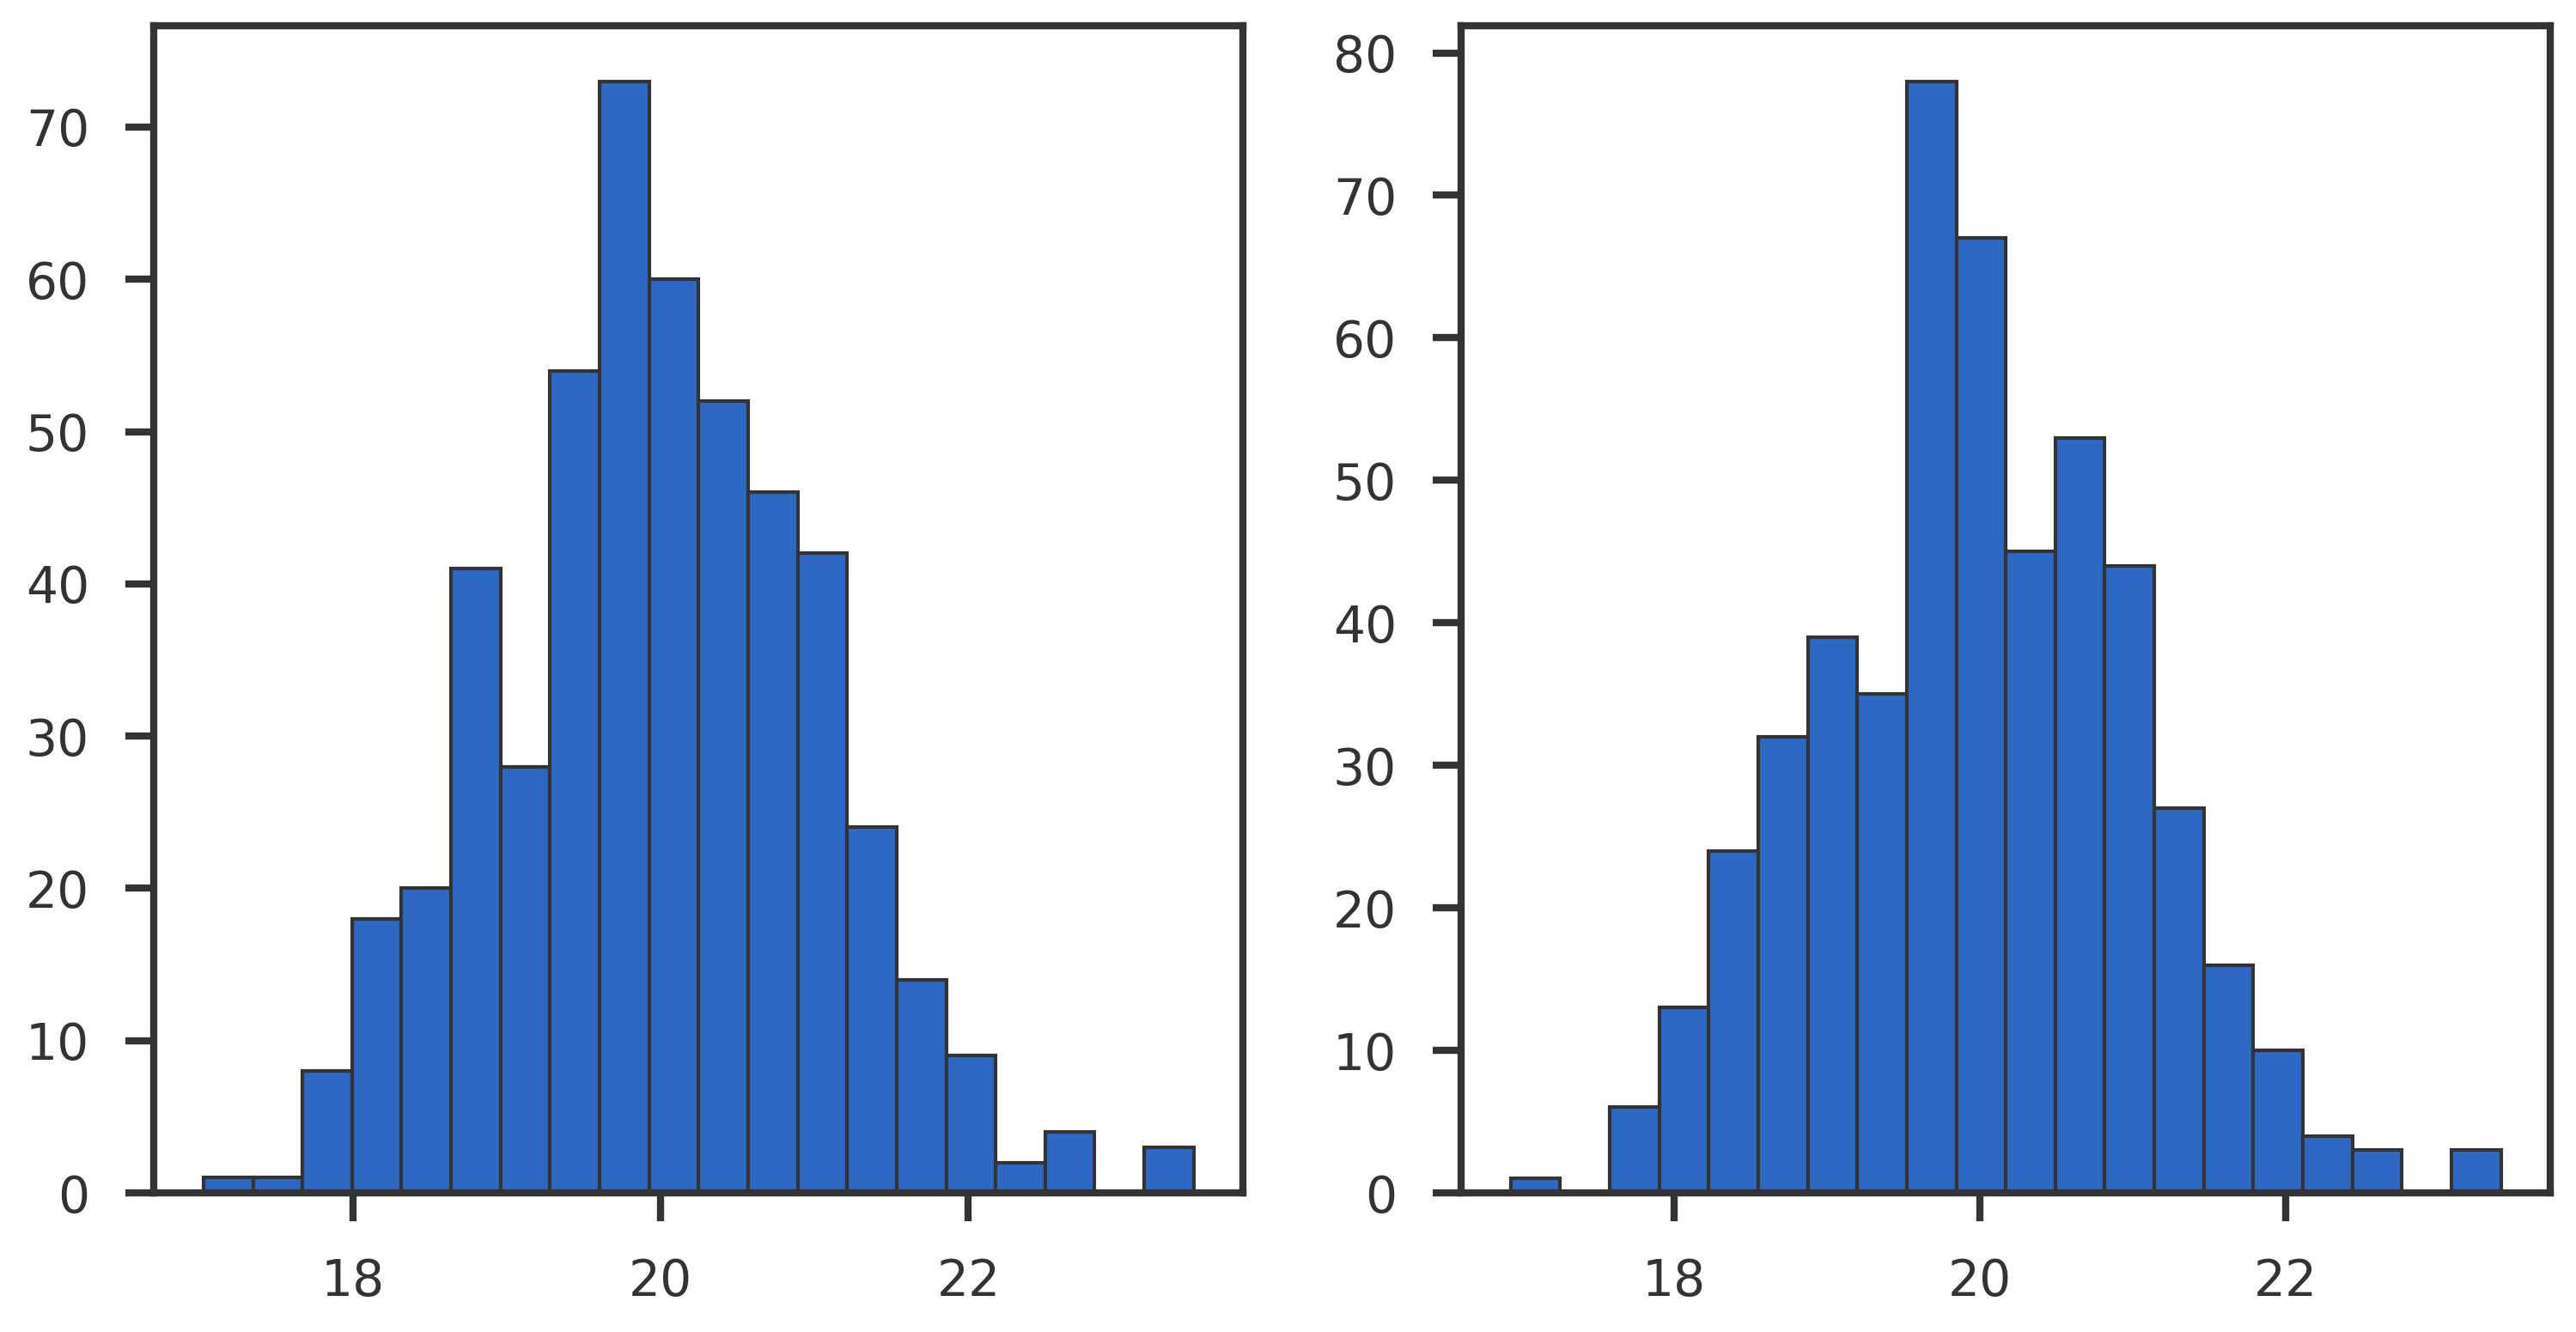

In [5]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(b)
ax2.hist(u)
plt.show()

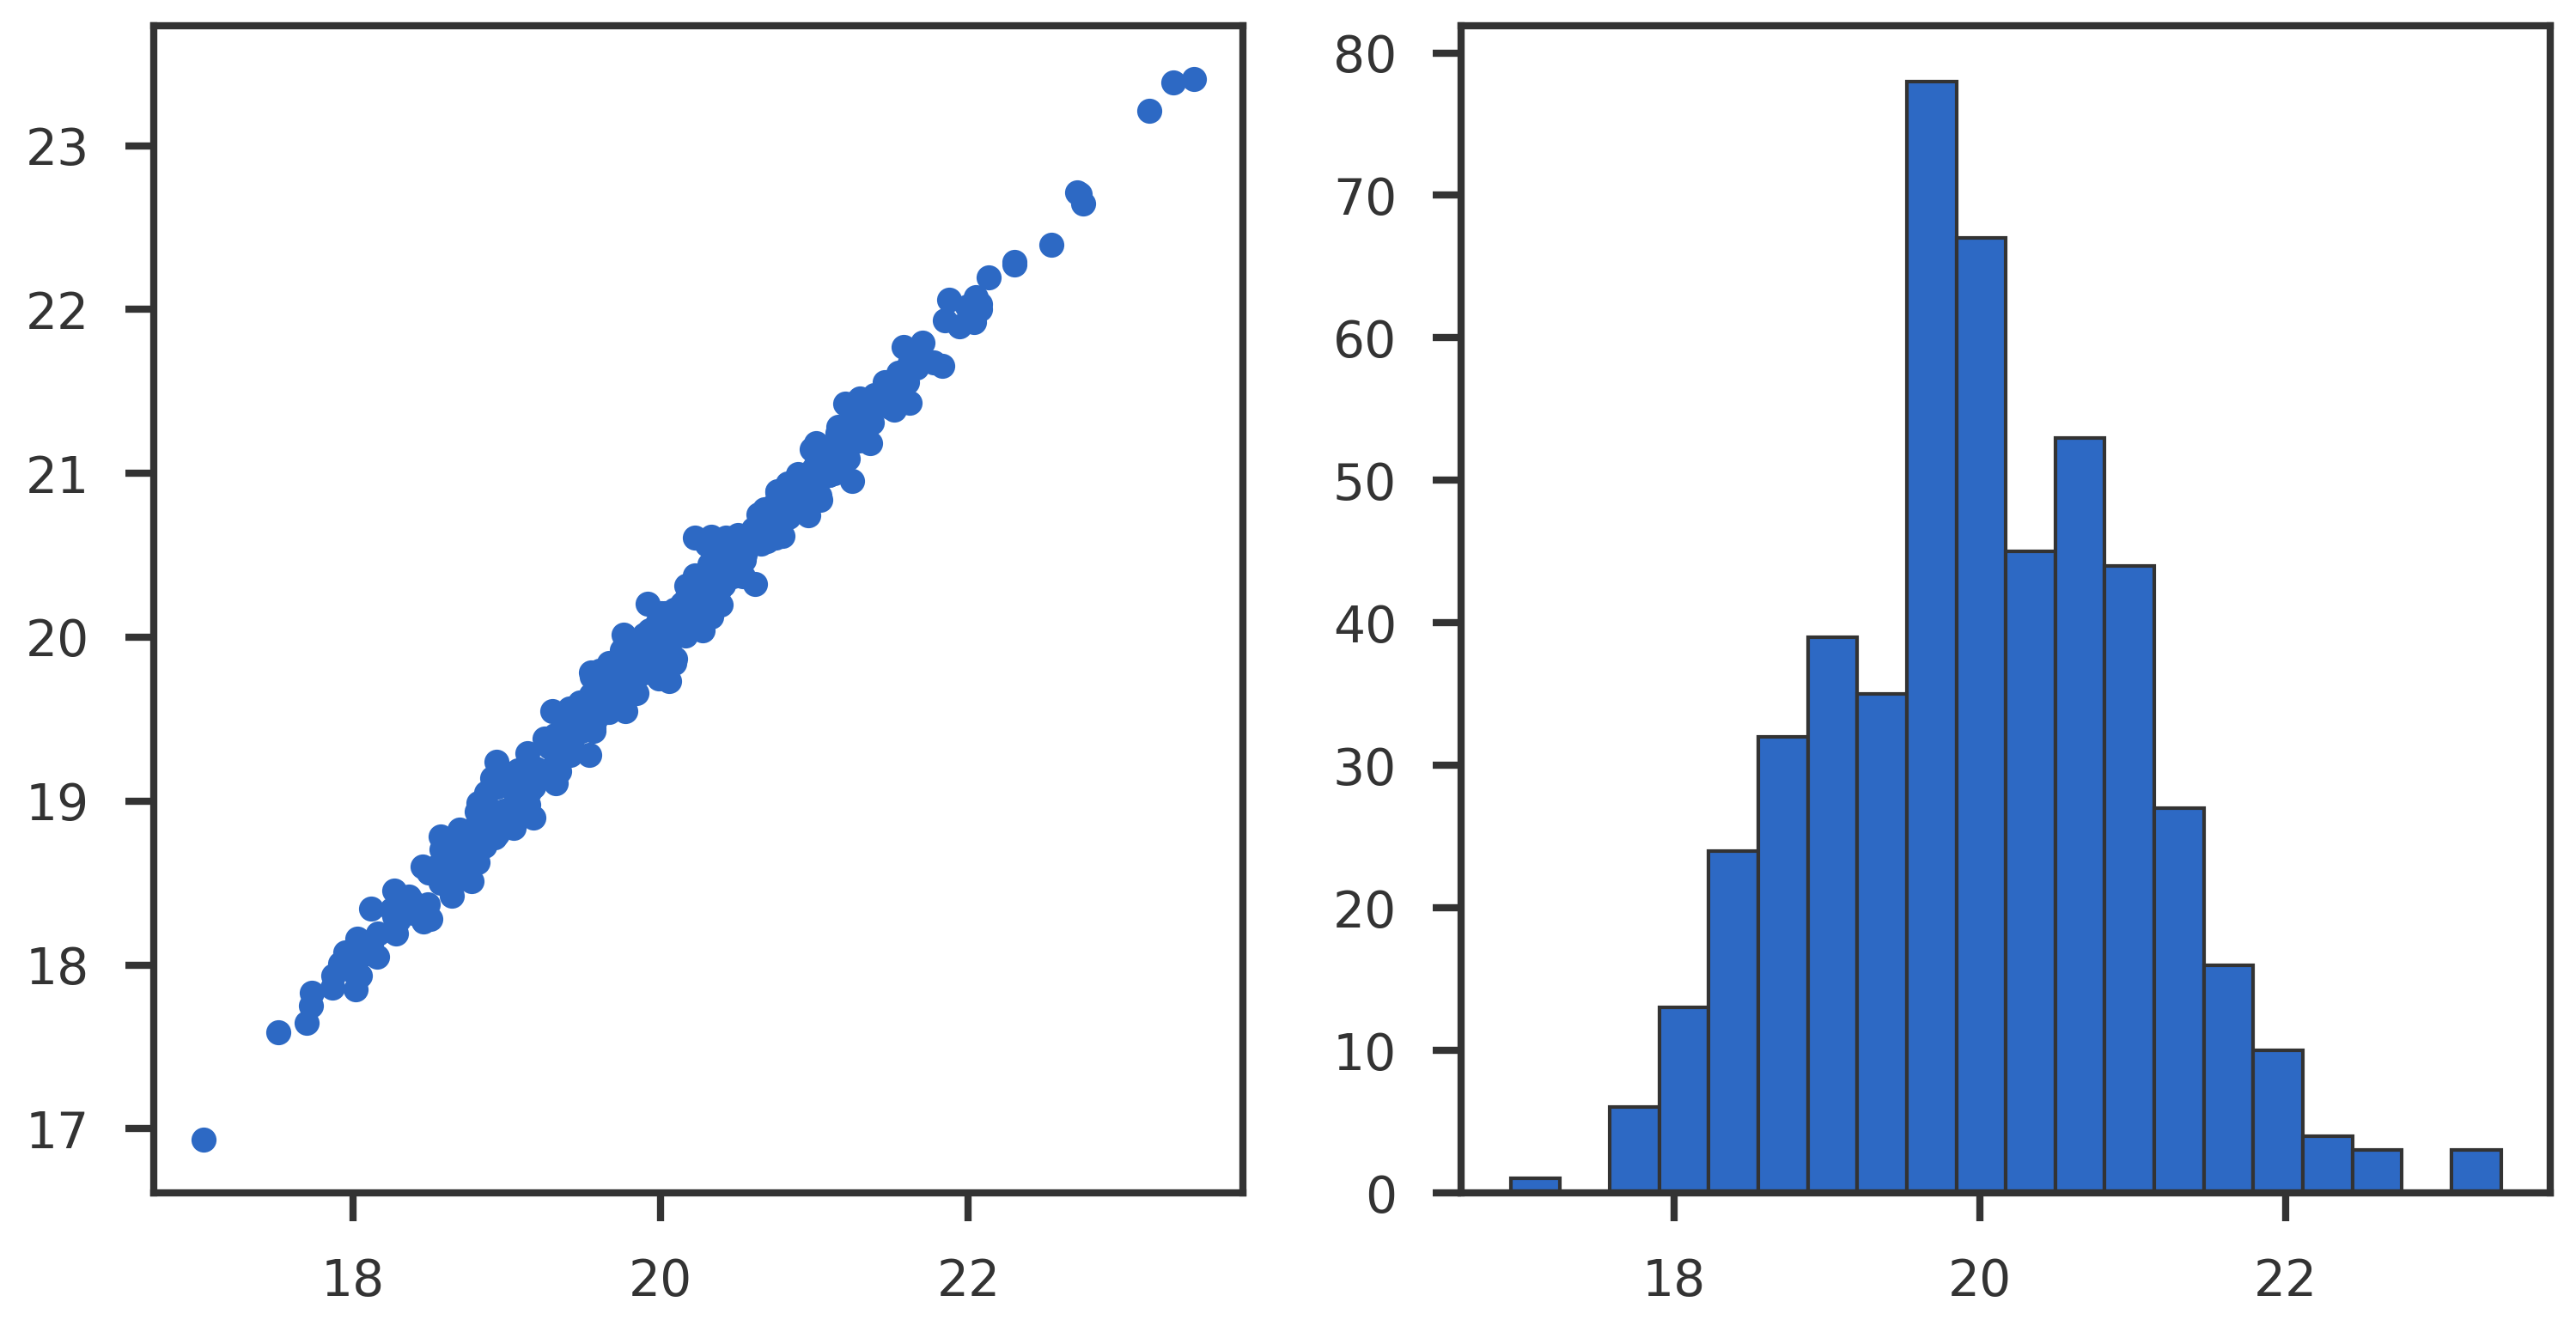

In [6]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(b, u)
ax2.hist(u)
plt.show()

In [7]:
X = np.random.normal(0, 1, size = n * p).reshape(n, p)
X = center_and_scale(X)

In [8]:
covX = np.dot(X, X.T)
err = np.random.normal(0, np.sqrt(s2), size = n)
y1 = np.dot(X, u) + err

In [9]:
yvar = s2 + su2 * covX
y2_b = np.random.multivariate_normal(np.dot(X, b), yvar)
y2_u = np.random.multivariate_normal(np.dot(X, u), np.eye(n) * s2)
y3_false = np.random.multivariate_normal(np.dot(X, b), np.eye(n) * s2)

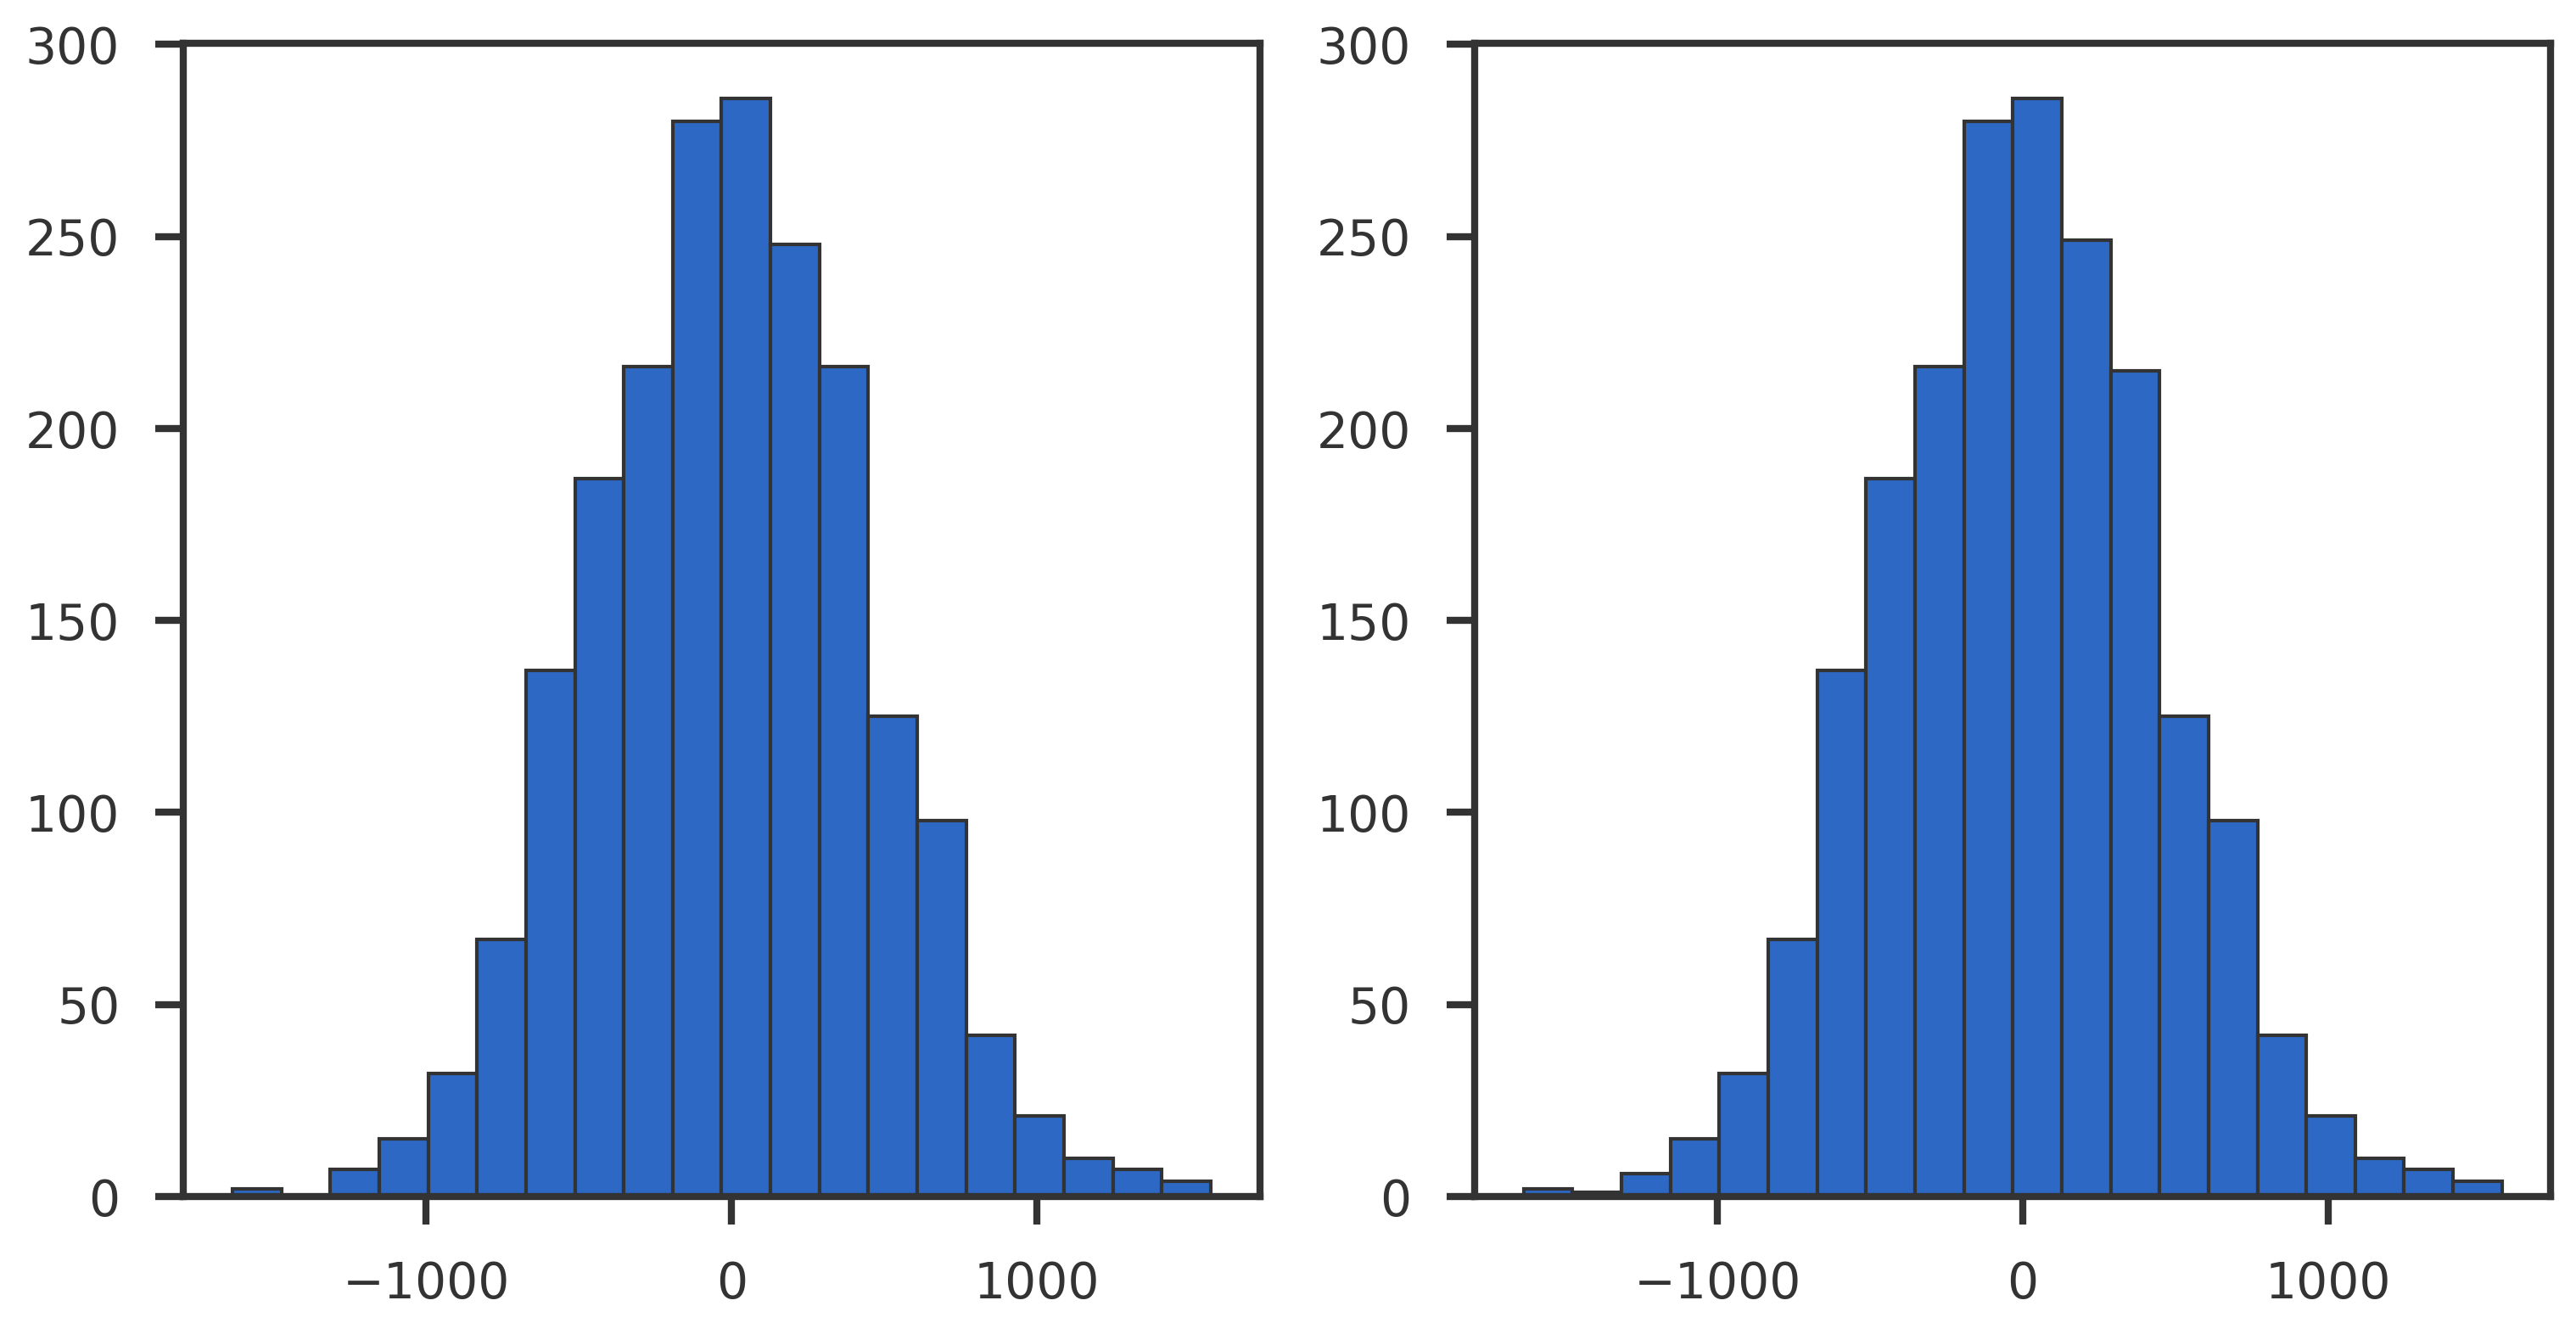

In [10]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(y1)
ax2.hist(y2_u)
plt.show()

In [11]:
e1 = np.random.multivariate_normal(np.zeros(n), yvar)
y3_b = np.dot(X, b) + e1

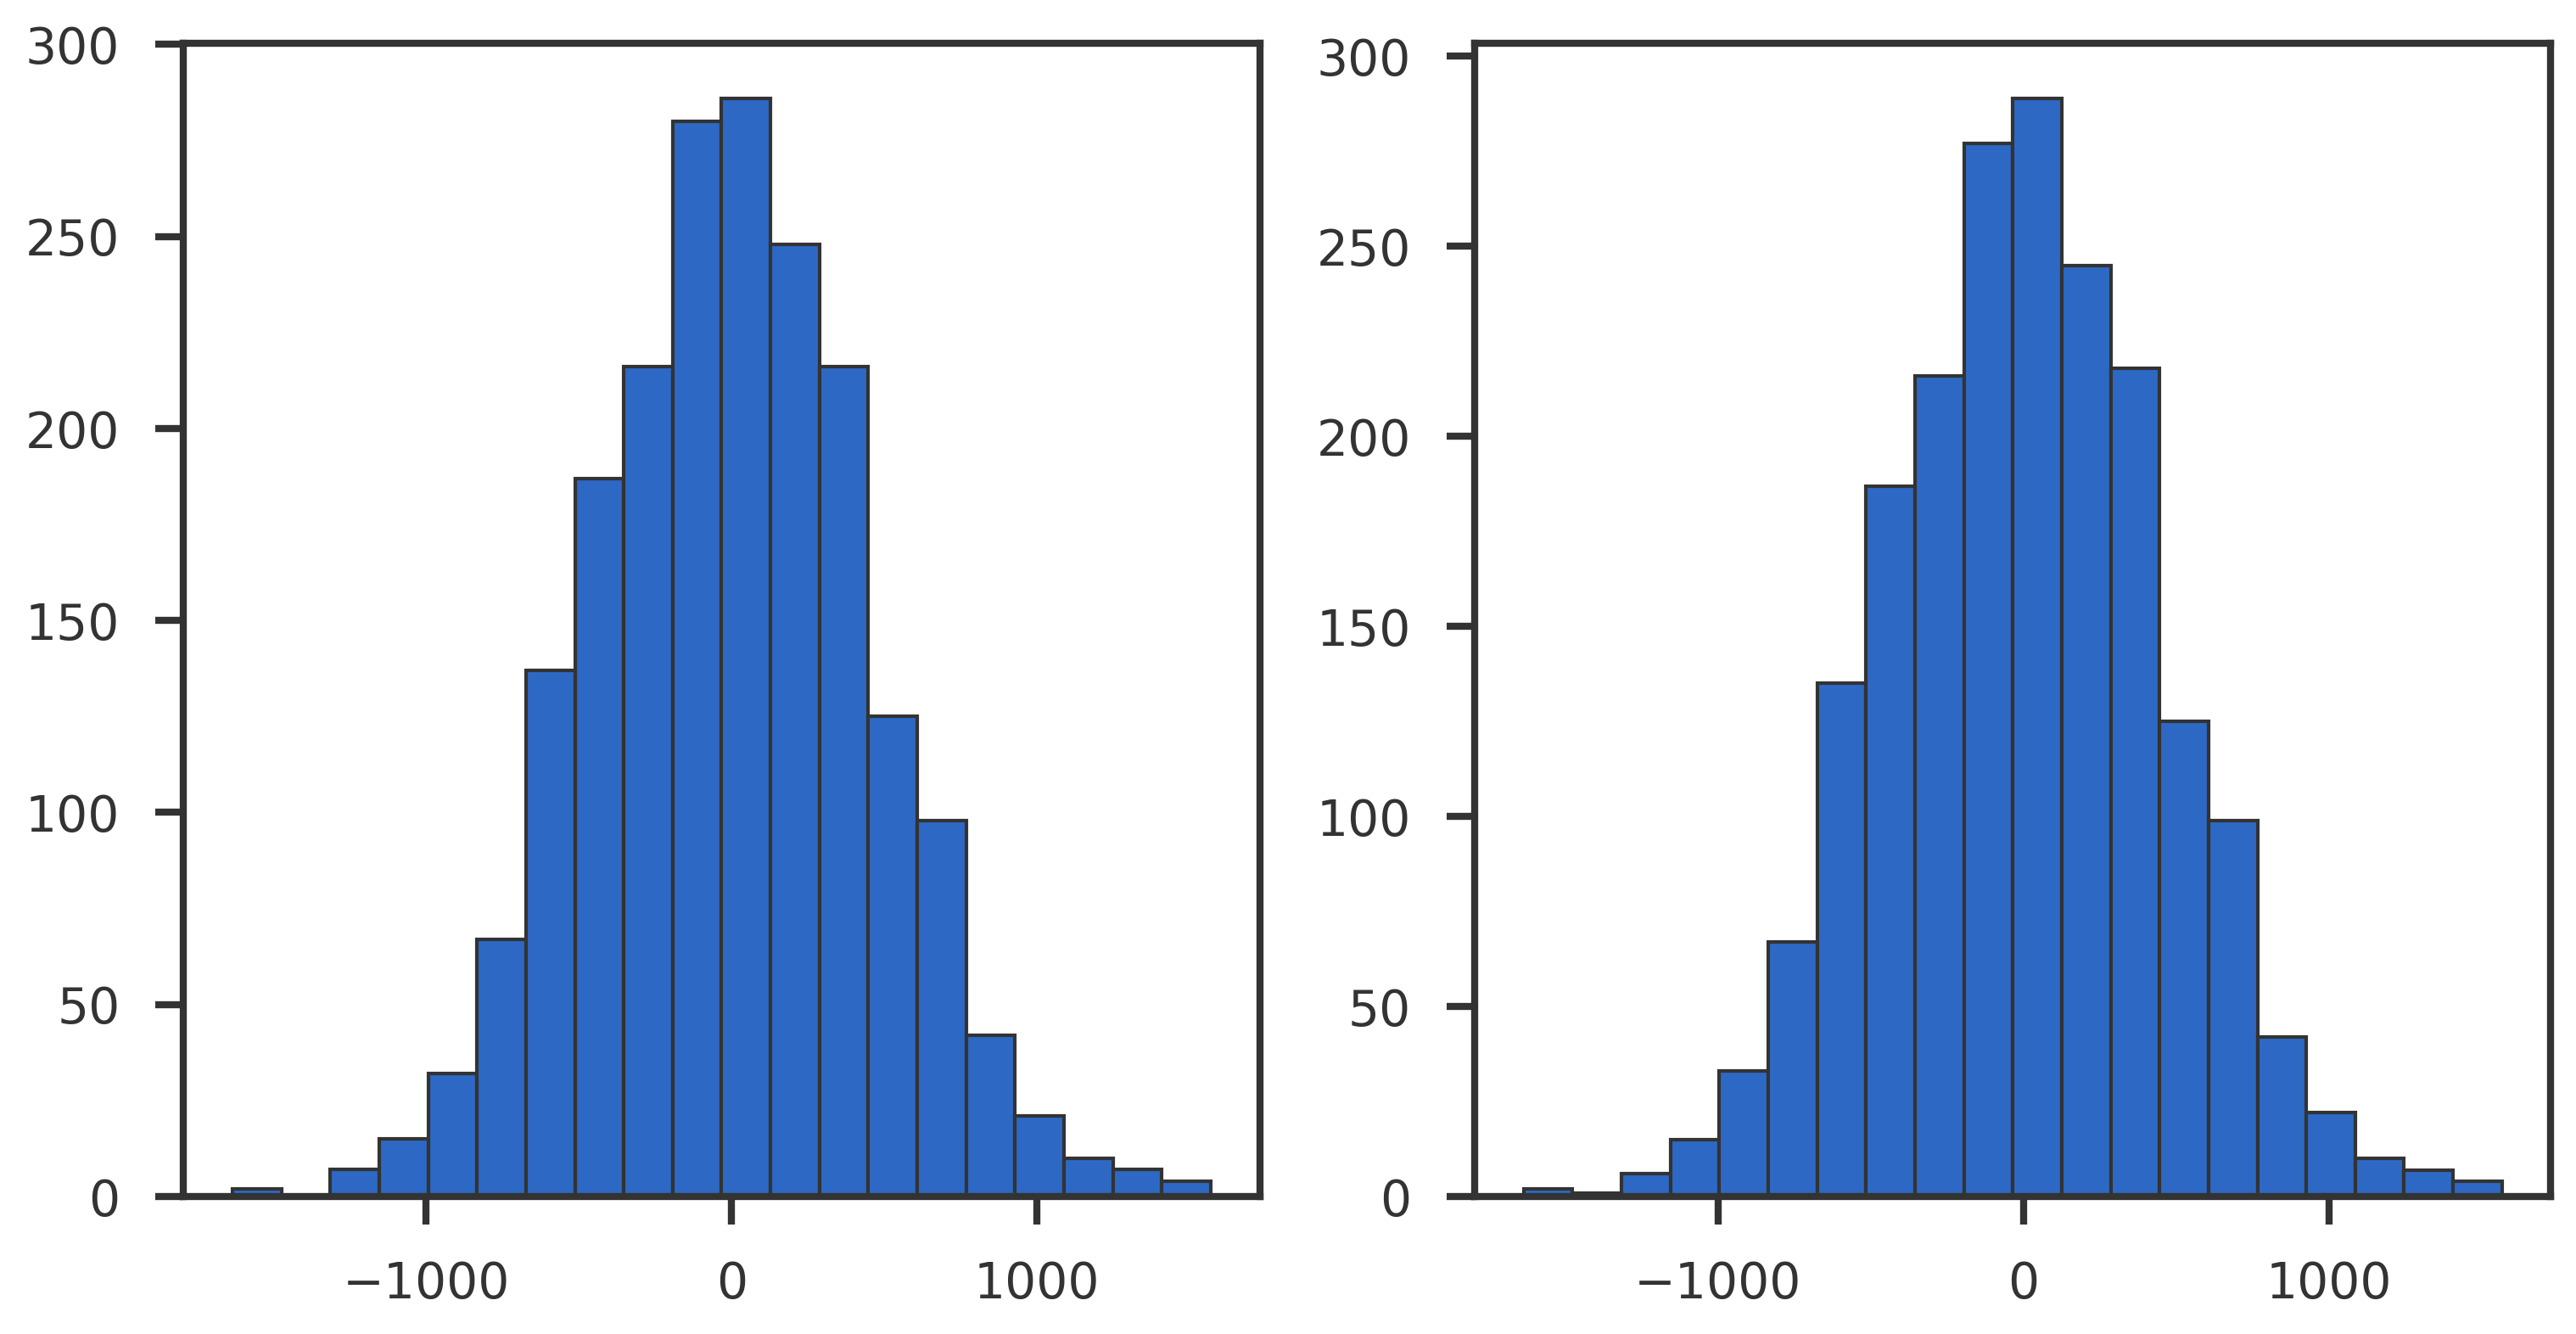

In [12]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(y1)
ax2.hist(y3_b)
plt.show()

In [13]:
m1 = np.random.multivariate_normal(np.zeros(n), su2 * covX)
utilde = np.random.multivariate_normal(np.zeros(p), np.eye(p) * su2)
m2 = np.dot(X, utilde)

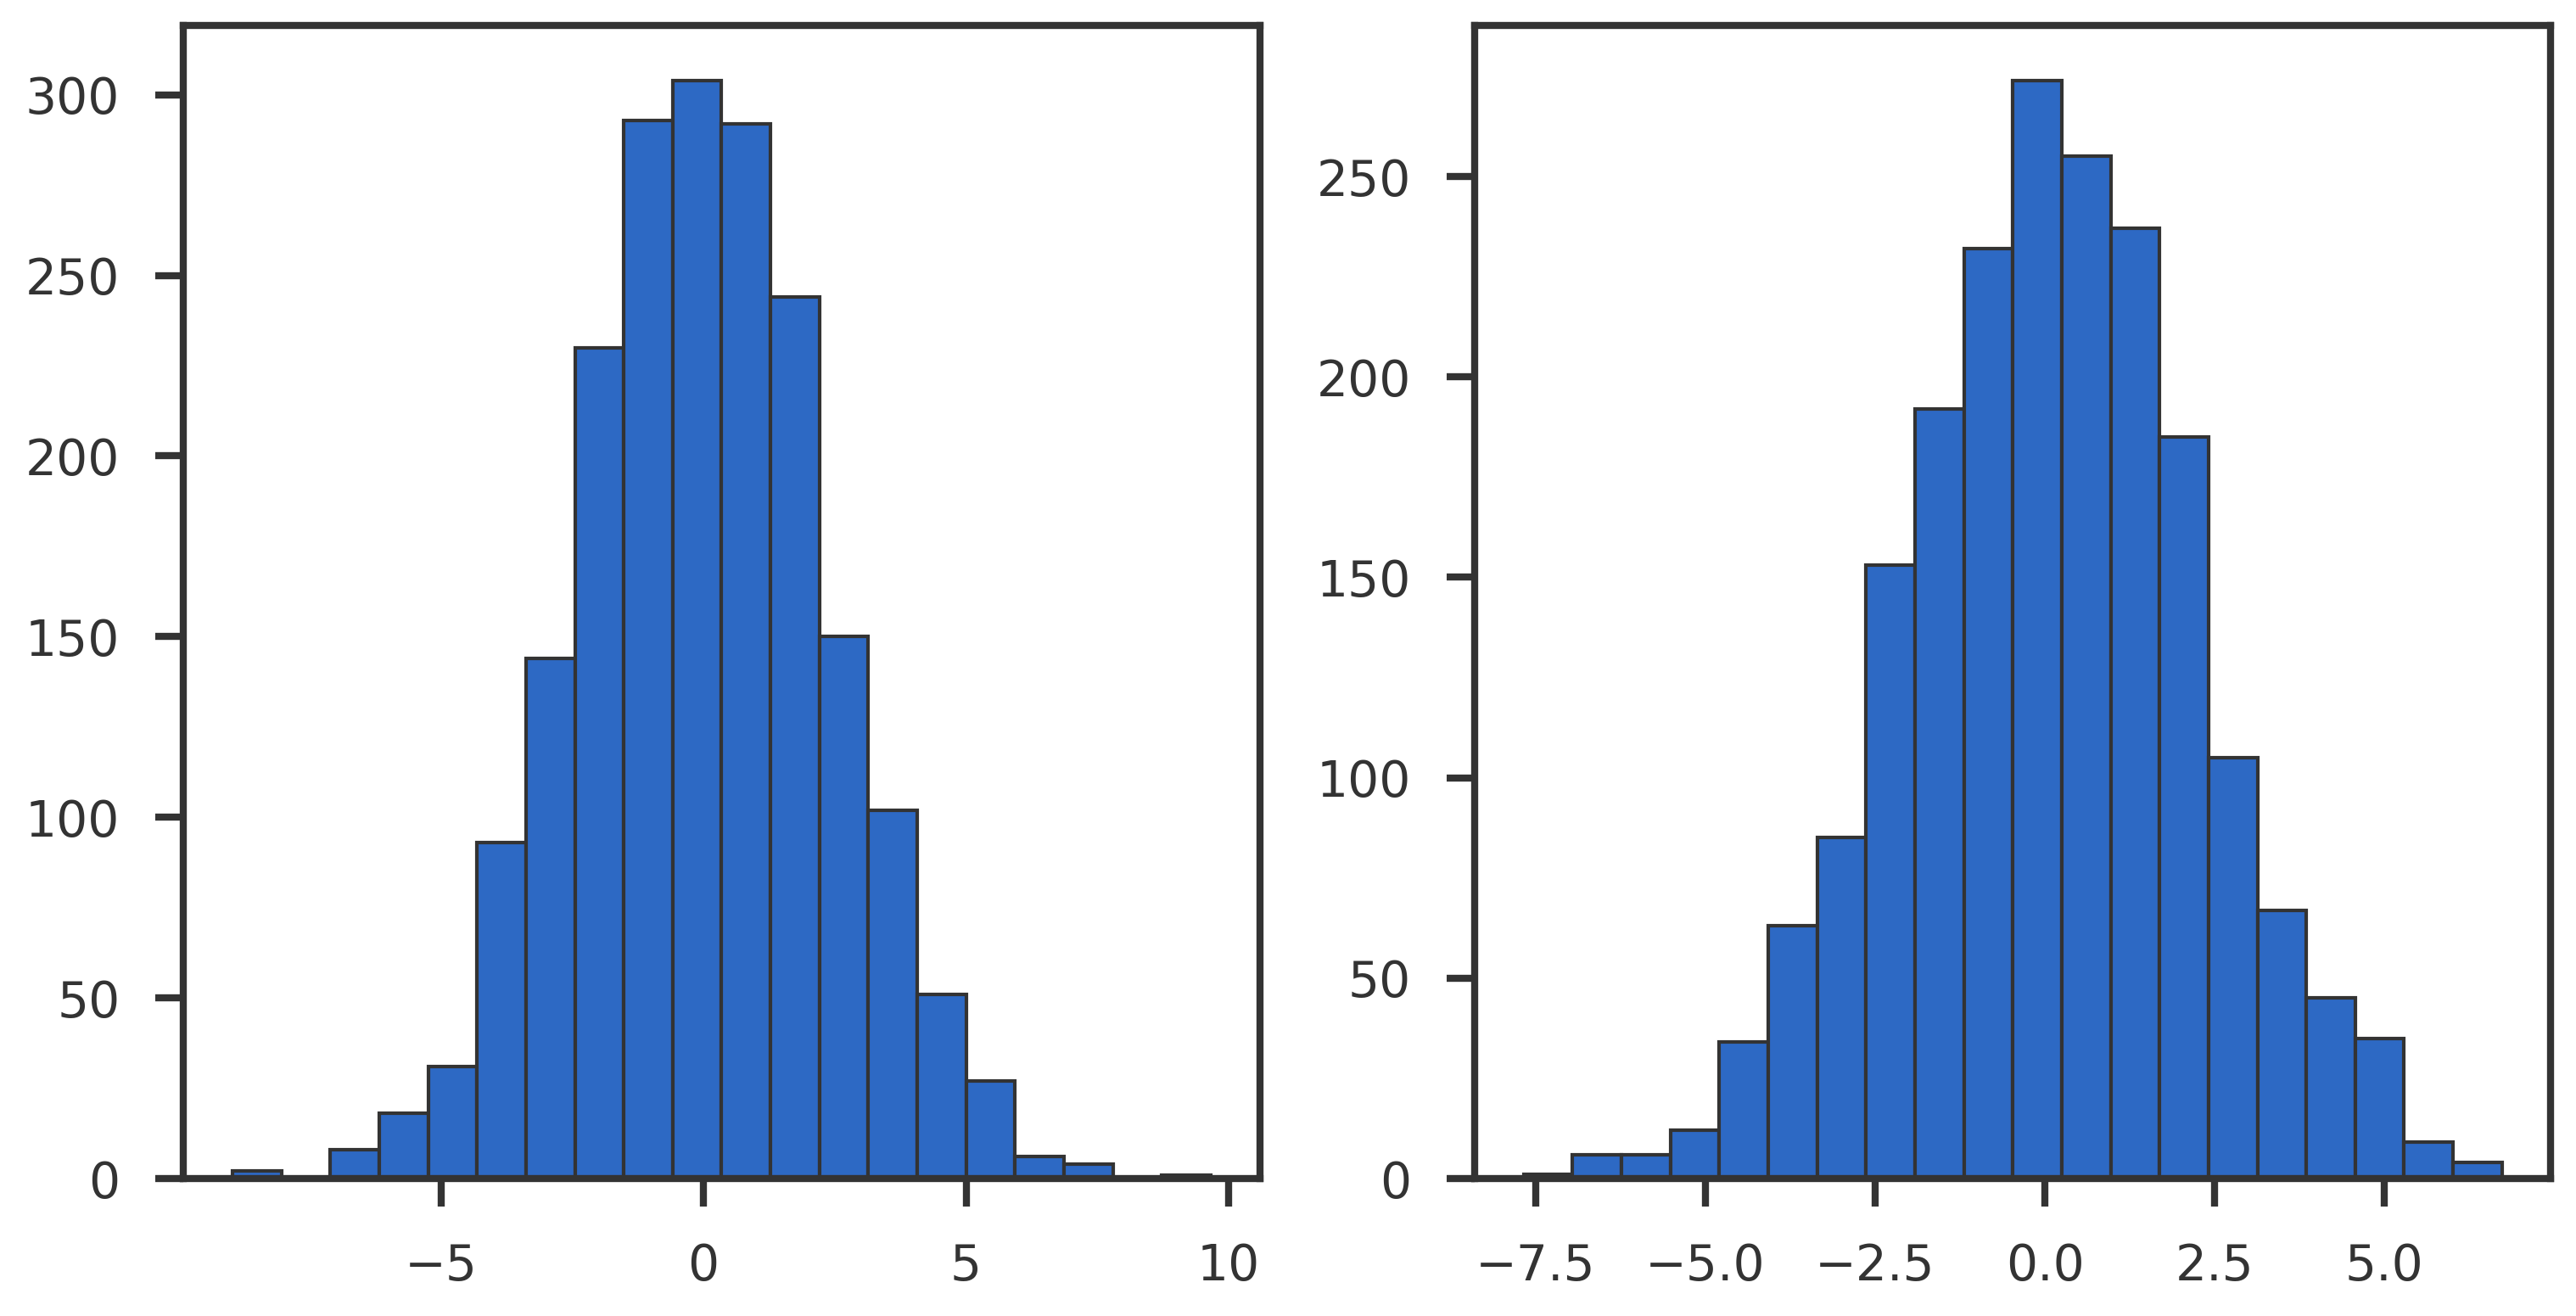

In [14]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(err + m2)
ax2.hist(e1)
plt.show()

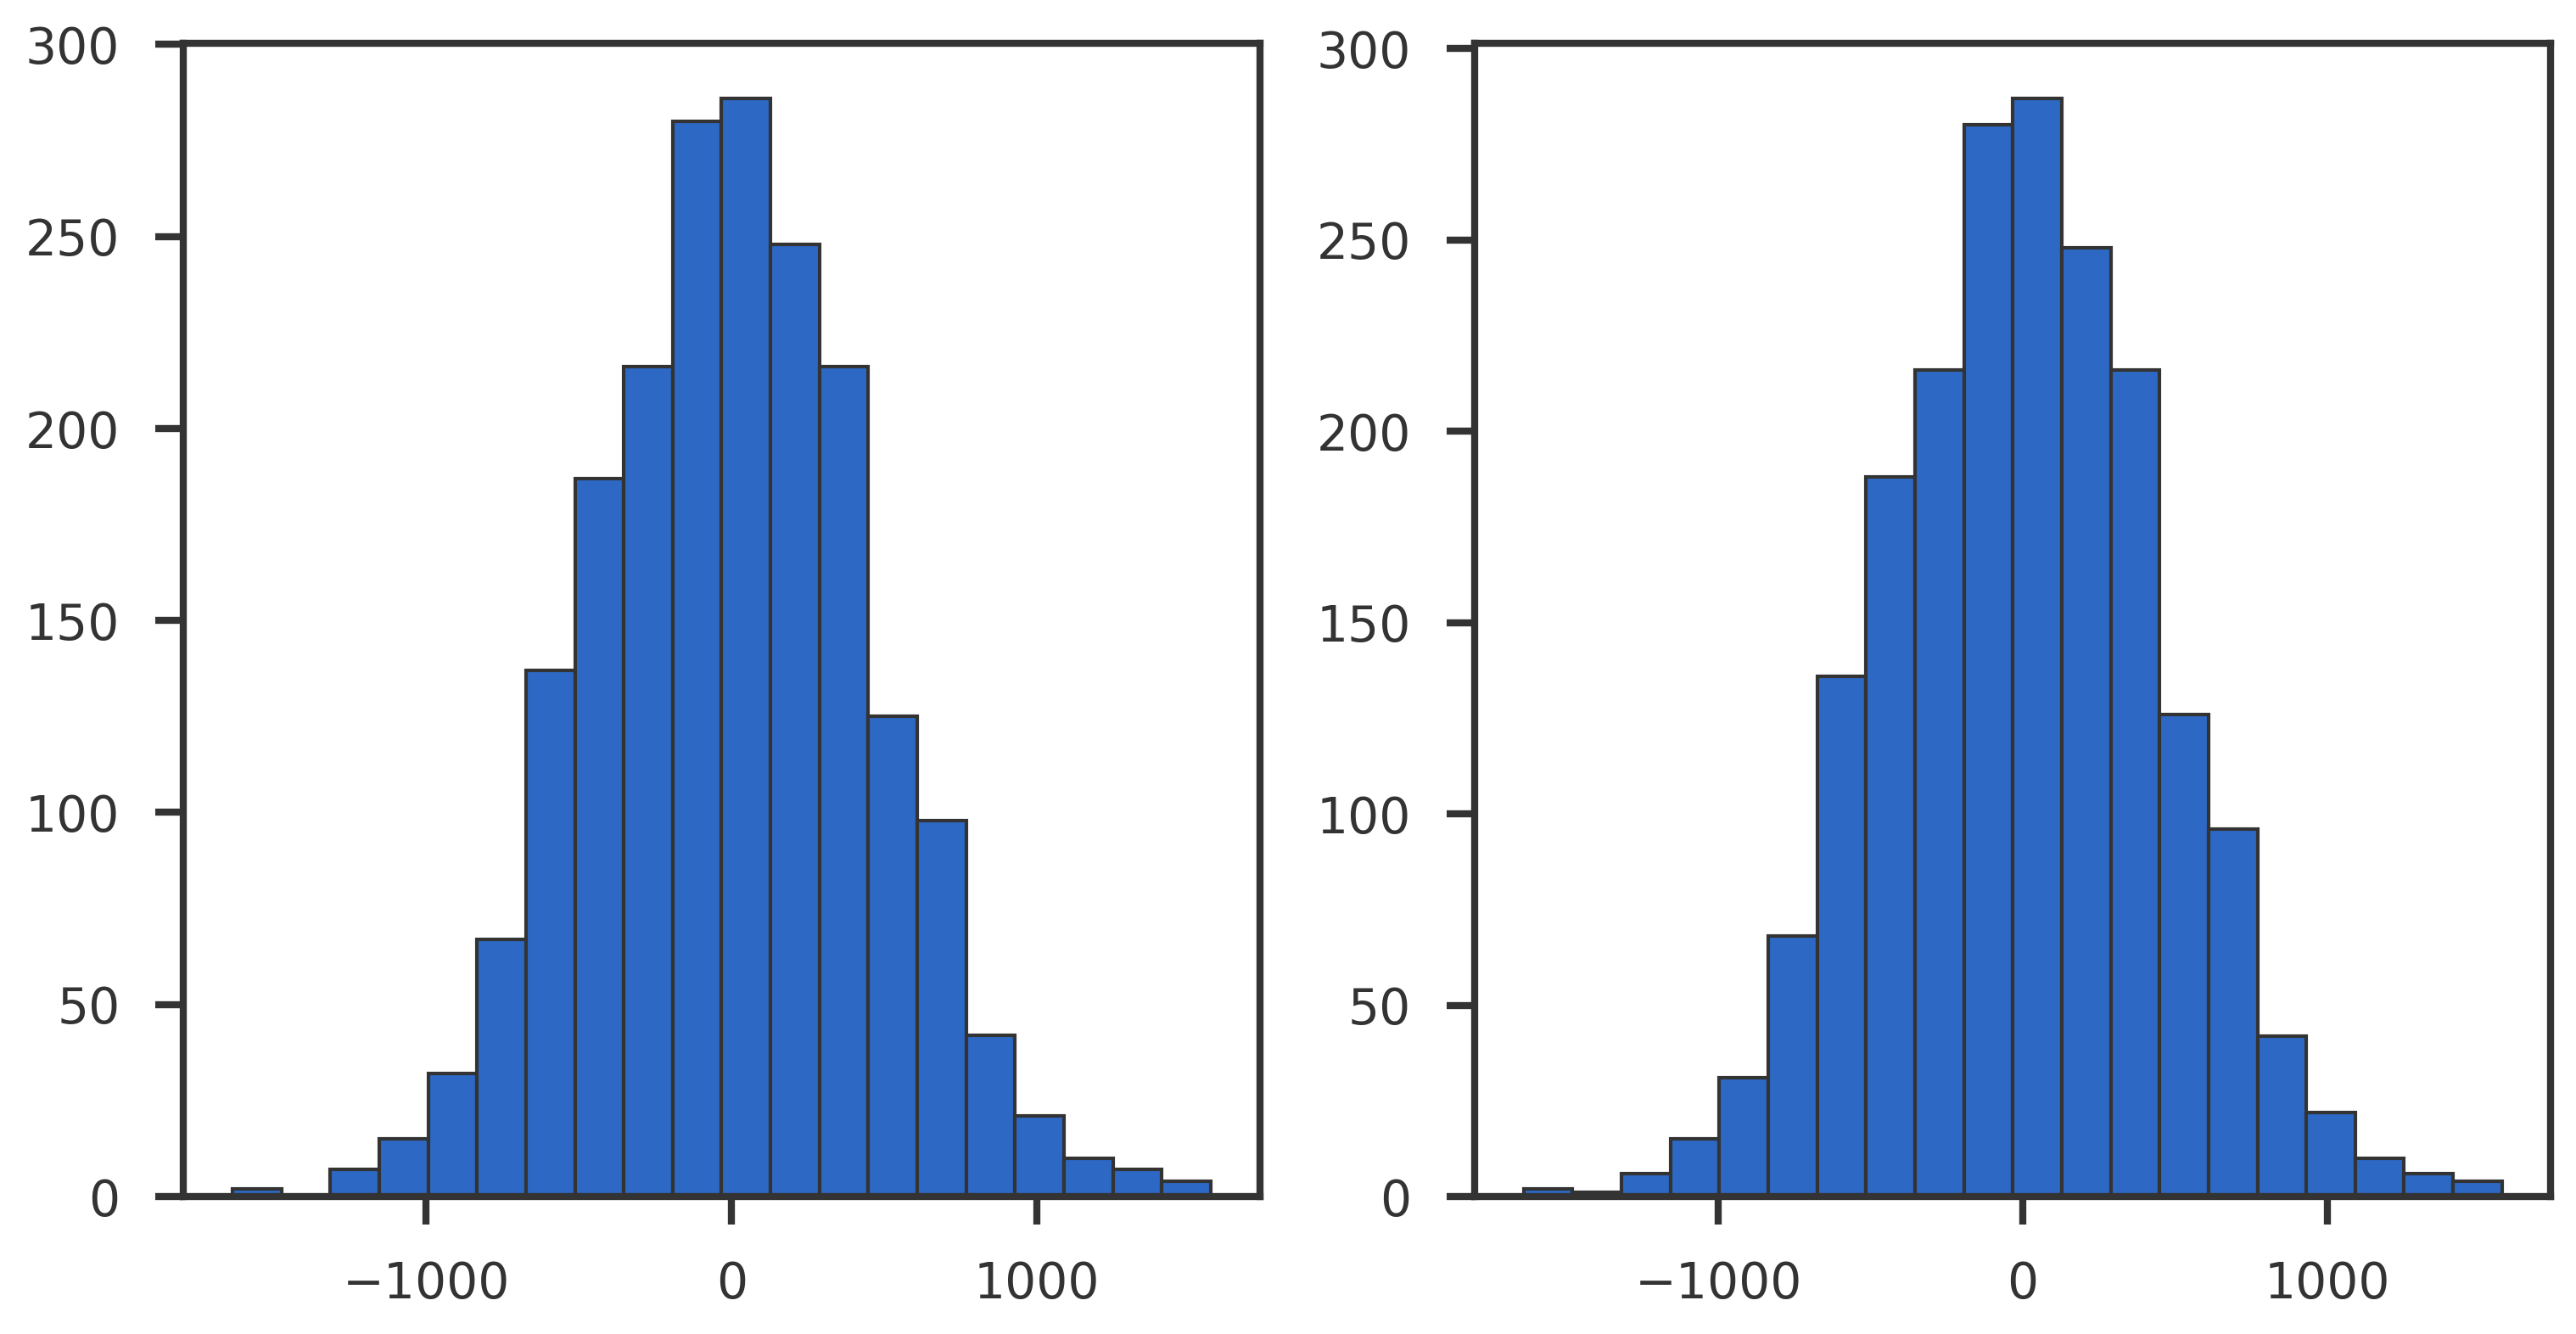

In [15]:
y4 = np.dot(X, b + utilde) + err
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(y1)
ax2.hist(y4)
plt.show()